## Denoising Images using Simple Autoencoders

### Import Relevant Libraries

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#Limiting GPU memory growth
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession
config = ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

print("GPU is available" if tf.test.is_gpu_available() else "NOT AVAILABLE")

GPU is available


### Load Dataset

In [2]:
(x_train, _), (x_test, _) = mnist.load_data()
#normalize 
x_train = x_train.astype('float32')/255.0
x_test=x_test.astype('float32')/255.0
#reshape to 1-d
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape, x_test.shape)

(60000, 784) (10000, 784)


### Noise Factor = `.1`

In [3]:
#adding noise
noise_factor = .1
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

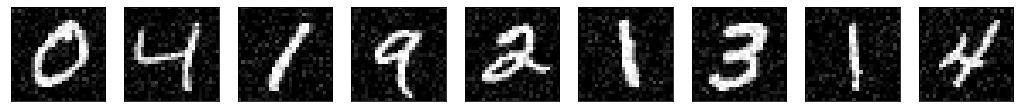

In [4]:
#Displaying images with noise
plt.figure(figsize=(20, 2))
n = 10 #change this number to visualise more digits.
for i in range(1,n):
    ax = plt.subplot(1, n, i)
    plt.imshow(x_train_noisy[i].reshape(28, 28),cmap="gray")
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()


### Deep Autoencoder Model Architecture

In [5]:
# reference : https://blog.keras.io/building-autoencoders-in-keras.html
input_img = Input(shape=(784,))
encoded = Dense(32, activation='relu')(input_img)
decoded = Dense(784, activation='sigmoid')(encoded)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

autoencoder.fit(x_train_noisy, x_train,
                epochs=30,
                batch_size=512,
                shuffle=True,verbose=2,
                validation_data=(x_test_noisy, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 - 1s - loss: 0.3396 - val_loss: 0.2309
Epoch 2/30
60000/60000 - 1s - loss: 0.2044 - val_loss: 0.1845
Epoch 3/30
60000/60000 - 1s - loss: 0.1755 - val_loss: 0.1639
Epoch 4/30
60000/60000 - 1s - loss: 0.1565 - val_loss: 0.1470
Epoch 5/30
60000/60000 - 1s - loss: 0.1417 - val_loss: 0.1342
Epoch 6/30
60000/60000 - 1s - loss: 0.1308 - val_loss: 0.1246
Epoch 7/30
60000/60000 - 1s - loss: 0.1226 - val_loss: 0.1176
Epoch 8/30
60000/60000 - 1s - loss: 0.1165 - val_loss: 0.1123
Epoch 9/30
60000/60000 - 1s - loss: 0.1118 - val_loss: 0.1082
Epoch 10/30
60000/60000 - 1s - loss: 0.1082 - val_loss: 0.1051
Epoch 11/30
60000/60000 - 1s - loss: 0.1054 - val_loss: 0.1028
Epoch 12/30
60000/60000 - 1s - loss: 0.1034 - val_loss: 0.1011
Epoch 13/30
60000/60000 - 1s - loss: 0.1019 - val_loss: 0.0997
Epoch 14/30
60000/60000 - 1s - loss: 0.1007 - val_loss: 0.0988
Epoch 15/30
60000/60000 - 1s - loss: 0.0998 - val_loss: 0.0980
Epoch 16/30
60

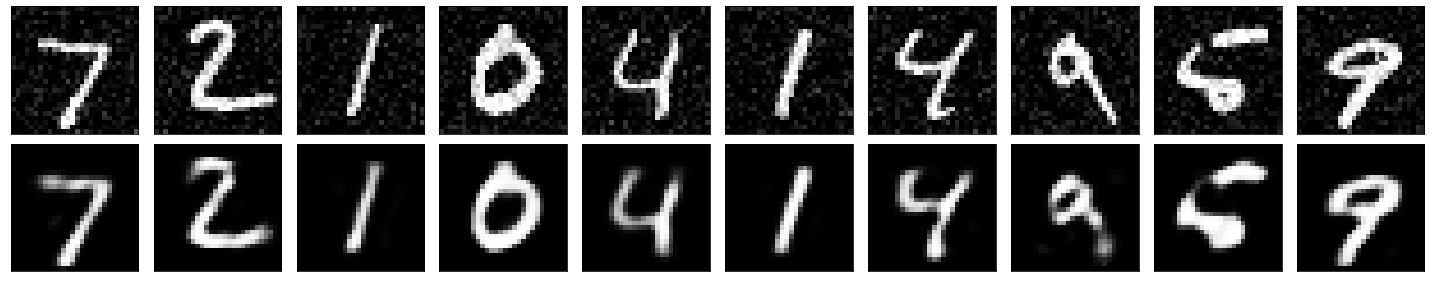

In [6]:
decoded_imgs = autoencoder.predict(x_test_noisy)   

plt.figure(figsize=(20, 4))
n = 10
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i+1)
    plt.imshow(x_test_noisy[i].reshape(28, 28), cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # display reconstructed (after noise removed) image
    ax1 = plt.subplot(2, n, i+1+n)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap='gray')
    ax1.get_xaxis().set_visible(False)
    ax1.get_yaxis().set_visible(False)
plt.tight_layout()
plt.show()

 ### Noise factor = `0.5`

In [7]:
#adding noise
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

#architecture
input_img = Input(shape=(784,))
encoded = Dense(32, activation='relu')(input_img)
decoded = Dense(784, activation='sigmoid')(encoded)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

autoencoder.fit(x_train_noisy, x_train,
                epochs=30,
                batch_size=512,
                shuffle=True,verbose=0,
                validation_data=(x_test_noisy, x_test))

autoencoder.evaluate(x_test_noisy, x_test, verbose=2)

10000/1 - 1s - loss: 0.1177


0.1263242124080658

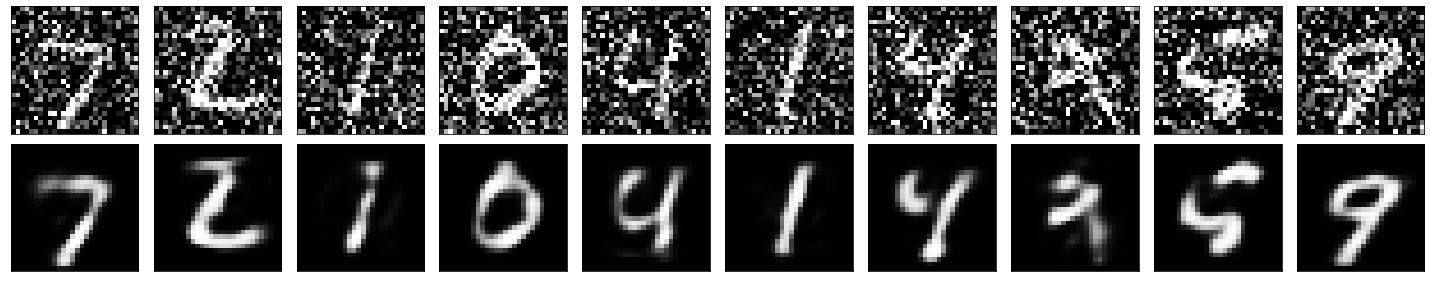

In [8]:
decoded_imgs = autoencoder.predict(x_test_noisy)   

plt.figure(figsize=(20, 4))
n = 10
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i+1)
    plt.imshow(x_test_noisy[i].reshape(28, 28), cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # display reconstructed (after noise removed) image
    ax1 = plt.subplot(2, n, i+1+n)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap='gray')
    ax1.get_xaxis().set_visible(False)
    ax1.get_yaxis().set_visible(False)
plt.tight_layout()
plt.show()

### Noise factor = `1`

In [9]:
#adding noise
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

#architecture
input_img = Input(shape=(784,))
encoded = Dense(32, activation='relu')(input_img)
decoded = Dense(784, activation='sigmoid')(encoded)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

autoencoder.fit(x_train_noisy, x_train,
                epochs=30,
                batch_size=512,
                shuffle=True,verbose=0,
                validation_data=(x_test_noisy, x_test))

autoencoder.evaluate(x_test_noisy, x_test, verbose=2)

10000/1 - 1s - loss: 0.1166


0.1251314033985138

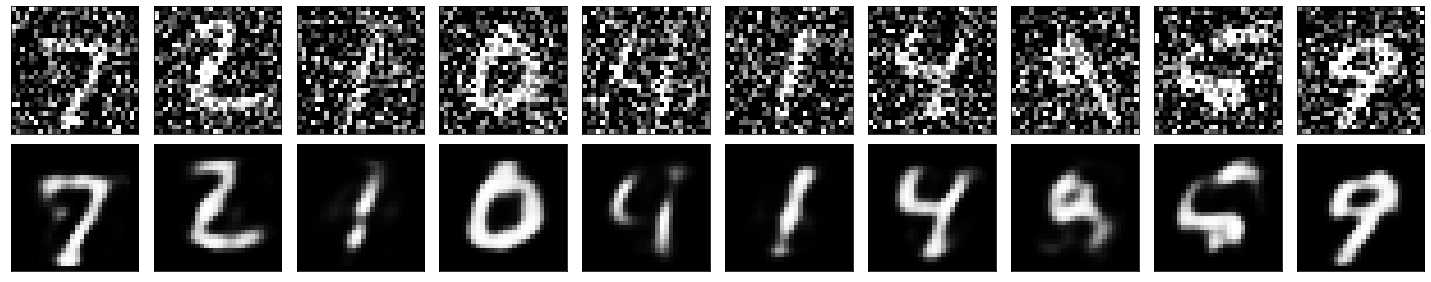

In [10]:
decoded_imgs = autoencoder.predict(x_test_noisy)   

plt.figure(figsize=(20, 4))
n = 10
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i+1)
    plt.imshow(x_test_noisy[i].reshape(28, 28), cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # display reconstructed (after noise removed) image
    ax1 = plt.subplot(2, n, i+1+n)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap='gray')
    ax1.get_xaxis().set_visible(False)
    ax1.get_yaxis().set_visible(False)
plt.tight_layout()
plt.show()

Comments:

- When the noise_factor is 0.1, the noise added to the image is low and the denoising autoencoder is able to predict the number properly
- When the noise_factor becomes 0.5, the numbers became more graininer and number 9 is not classified properly
- When the noise_factor becomes 1, the output shape of some of the images changes and numbers 1,4, 5 and 9 was misclassified as a different number or a random shape.
- Also with the epochs kept same, the noise factor is making it harder for the network to learn. The val_loss in first case is 0.09 and in the other two case it's at .125